# 深度学习100例-卷积神经网络（CNN）服装图像分类 | 第3天

## 1. 前期工作

### 1.1 导入数据

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

### 1.2 归一化

In [2]:
# 将像素的值标准化至0到1的区间内。
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### 1.3 调整图片格式

In [3]:
#调整数据到我们需要的格式
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

### 1.4 可视化

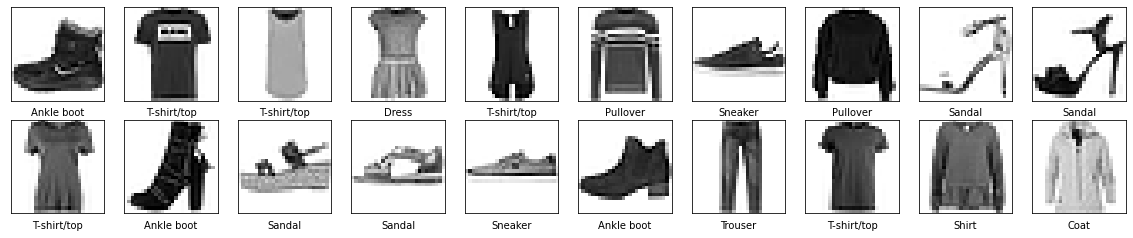

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 2. 构建CNN网络

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), #卷积层1，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层1，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  #卷积层2，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层2，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  #卷积层3，卷积核3*3
    
    layers.Flatten(),                      #Flatten层，连接卷积层与全连接层
    layers.Dense(64, activation='relu'),   #全连接层，特征进一步提取
    layers.Dense(10)                       #输出层，输出预期结果
])

model.summary()  # 打印网络结构

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## 3. 编译

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 4.训练模型

In [7]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5011 - accuracy: 0.8147 - val_loss: 0.3696 - val_accuracy: 0.8634
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3218 - accuracy: 0.8828 - val_loss: 0.3056 - val_accuracy: 0.8890
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2756 - accuracy: 0.8991 - val_loss: 0.2879 - val_accuracy: 0.8975
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2452 - accuracy: 0.9090 - val_loss: 0.2744 - val_accuracy: 0.9004
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2220 - accuracy: 0.9174 - val_loss: 0.2813 - val_accuracy: 0.8992
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2019 - accuracy: 0.9251 - val_loss: 0.2770 - val_accuracy: 0.9007
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1845 - accuracy: 0.9322 - val_loss: 0.2579 -

## 5.预测

313/313 [==============================] - 1s 4ms/step
Pullover


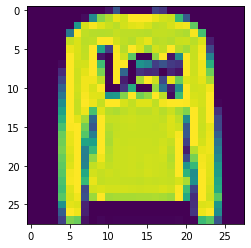

In [8]:
plt.imshow(test_images[1])

import numpy as np

pre = model.predict(test_images)
print(class_names[np.argmax(pre[1])])

## 6.模型评估

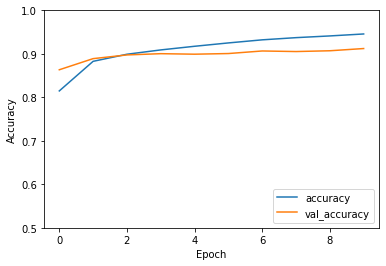

313/313 - 1s - loss: 0.2659 - accuracy: 0.9122 - 976ms/epoch - 3ms/step
测试准确率为： 0.9121999740600586


In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print("测试准确率为：",test_acc)